In [75]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
import numpy as np
import random

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [20]:
from tensorflow import keras

In [3]:
(x_train,y_train) , (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [57]:
(X_train,Y_train) , (X_test, Y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

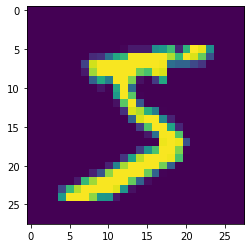

In [9]:
plt.imshow(x_train[0])

In [10]:
y_train[0]

5

In [11]:
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [18]:
rows, cols, channels = 28, 28, 1
classes = 10

In [ ]:
x_train[0]

In [15]:
x_train = x_train/255 #normalise 
x_test = x_test/255

In [ ]:
x_train[0]

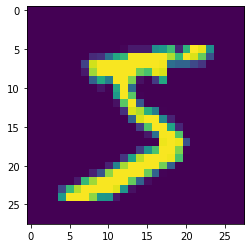

In [17]:
plt.imshow(x_train[0])

In [19]:
x_train = x_train.reshape((-1, rows, cols, channels))
x_test = x_test.reshape((-1, rows, cols, channels))

In [21]:
y_train = keras.utils.to_categorical(y_train, classes) #one hot encoding lables
y_test = keras.utils.to_categorical(y_test, classes)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
y_train.shape

(60000, 10)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation='softmax'))

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    return model

In [28]:
model = create_model()

In [29]:
model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0194 - accuracy: 0.8645 - val_loss: 0.0066 - val_accuracy: 0.9569
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0088 - accuracy: 0.9418 - val_loss: 0.0046 - val_accuracy: 0.9703
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0074 - accuracy: 0.9528 - val_loss: 0.0043 - val_accuracy: 0.9718
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0065 - accuracy: 0.9576 - val_loss: 0.0041 - val_accuracy: 0.9733
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0057 - accuracy: 0.9632 - val_loss: 0.0034 - val_accuracy: 0.9776
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0052 - accuracy: 0.9662 - val_loss: 0.0034 - val_accuracy: 0.9790
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0048 - accuracy: 0.9695 - val_loss: 0.0034 - val_ac

In [30]:
print("Base accuracy:", model.evaluate(x=x_test, y=y_test, verbose=0))

Base accuracy: [0.002787253586575389, 0.983299970626831]


## Testing loss  = 0.28%
# Testing Accuracy = 98.33%

In [50]:
def adversarial_pattern(image, label):
  image = tf.cast(image, tf.float32)
  
  with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)

  gradient = tape.gradient(loss, image)
  signed_grad = tf.sign(gradient)
  return signed_grad

In [44]:
image = x_train[0]

In [45]:
image_label = y_train[0]

In [51]:
disturbance = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label)

In [53]:
disturbance = disturbance.numpy()

In [83]:
adversarial = image + disturbance * 0.1

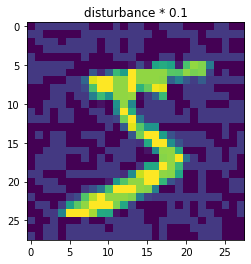

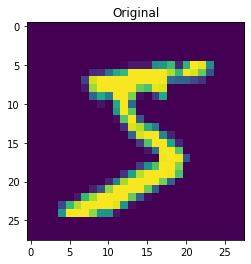

In [87]:
if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.title("disturbance * 0.1")
plt.show()
plt.title("Original")
plt.imshow(X_train[0])

In [76]:
adversarial = image + disturbance * 0.2

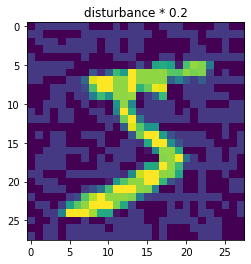

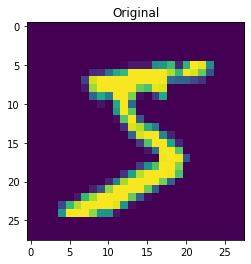

In [86]:
if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.title("disturbance * 0.2")
plt.show()
plt.title("Original")
plt.imshow(X_train[0])

In [63]:
print(labels[model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(labels[model.predict(adversarial).argmax()])

five
three


In [78]:
def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            disturbance = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label)
            disturbance = disturbance.numpy()
    
            adversarial = image + disturbance * 0.2
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

In [79]:
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))

In [80]:
print("Accuracy on adversarial dataset:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Accuracy on adversarial dataset: [0.17512360215187073, 0.04749999940395355]


# Accuracy reduced from 98.33% to 34.11% by adding 10% of noise
# it dropped to 4% when we doubled the noise in the image